# タイタニックの生存者予測

In [100]:
#モジュールインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [101]:
#test
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [104]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## trainから色々分析

In [105]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


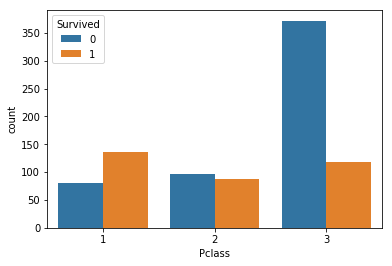

In [8]:
#生存者とクラス
sns.countplot('Pclass',data=train_df,hue='Survived')

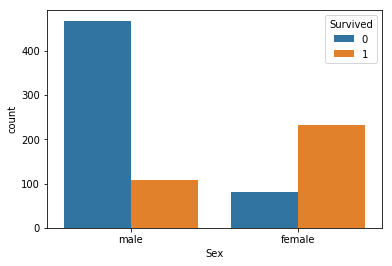

In [9]:
#性別
sns.countplot('Sex',data=train_df,hue='Survived')

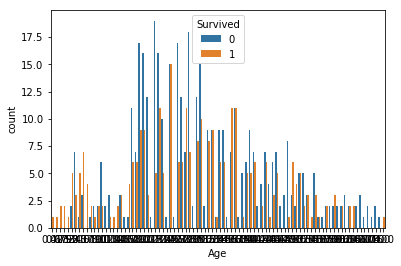

In [10]:
#年齢
sns.countplot('Age',data=train_df,hue='Survived')

In [106]:
def kesson_table(df):
    null_val = df.isnull().sum()
    per = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val,per],axis=1)
    kesson_table = kesson_table.rename(columns={'0':'lost count','1':'lost per'})
    return kesson_table

In [107]:
kesson_table(train_df)

,0,1
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [108]:
kesson_table(test_df)

,0,1
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [109]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
#一人かどうか追加
# 0: not alone 1: alone
def add_alone(alone):
    sib,par = alone
    if sib > 0 or par > 0:
        return 0
    else:
        return 1

In [111]:
train_df['Alone'] = train_df[['SibSp','Parch']].apply(add_alone,axis=1)

In [112]:
train_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


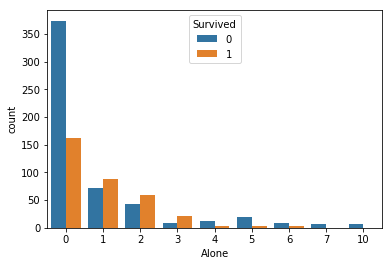

In [22]:
#一人かどうか
sns.countplot('Alone',data=train_df,hue='Survived')

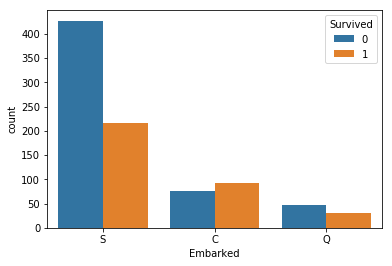

In [23]:
sns.countplot('Embarked',data=train_df,hue='Survived')

In [113]:
#子供の判定
# 0:male 1: female 2:child
def add_child(person):
    sex,age = person
    if age <= 16:
        return 2
    elif sex == 'male':
        return 0
    else:
        return 1

In [114]:
train_df['Adult'] = train_df[['Sex','Age']].apply(add_child,axis=1)

In [115]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,2


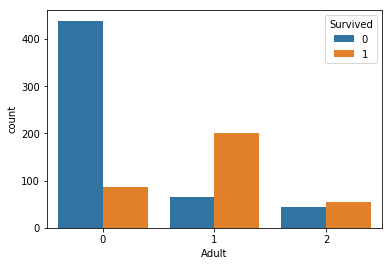

In [116]:
sns.countplot('Adult',data=train_df,hue='Survived')

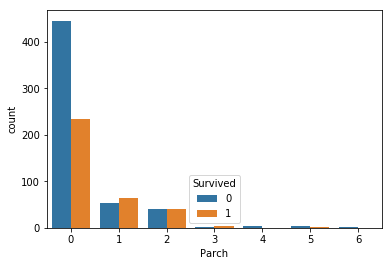

In [28]:
sns.countplot('Parch',data=train_df,hue='Survived')

In [117]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [118]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [120]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Adult


In [121]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [122]:
#Embarkedを変換
# S:0 C:1 Q:2
def convert_Emb(str):
    if str == 'S':
        return 0
    elif str == 'C':
        return 1
    else:
        return 2

In [123]:
train_df['Embarked_conv'] = train_df['Embarked'].apply(convert_Emb)

In [124]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Adult,Embarked_conv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0


In [125]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
test_df['Alone'] = test_df[['SibSp','Parch']].apply(add_alone,axis=1)
test_df['Adult'] = test_df[['Sex','Age']].apply(add_child,axis=1)
test_df['Embarked_conv'] = test_df['Embarked'].apply(convert_Emb)

In [127]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Adult,Embarked_conv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1,0


In [40]:
from sklearn import tree

#決定木によるモデル１
target = train_df['Survived'].values
features = train_df[['Pclass','Embarked_conv','Alone','Adult']].values

my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features, target)

features_test = test_df[['Pclass','Embarked_conv','Alone','Adult']].values

my_prediction = my_tree_one.predict(features_test)

In [41]:
my_prediction.shape

(418,)

In [42]:
my_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [44]:
# PassengerIdを取得
PassengerId = np.array(test_df["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId,columns = ['Survived'])

In [45]:
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one_0303.csv", index_label = ["PassengerId"])

In [98]:
#決定木によるモデル2
# 追加となった項目も含めて予測モデルその2で使う値を取り出す
features_two = train_df[['Pclass','Embarked_conv','Alone','Adult']].values
 
# 決定木の作成とアーギュメントの設定
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

In [99]:
test_features_2 = test_df[['Pclass','Embarked_conv','Alone','Adult']].values
 
# 「その2」の決定木を使って予測をしてCSVへ書き出す
my_prediction_tree_two = my_tree_two.predict(test_features_2)

PassengerId = np.array(test_df["PassengerId"]).astype(int)
my_solution_tree_two = pd.DataFrame(my_prediction_tree_two, PassengerId, columns = ["Survived"])
my_solution_tree_two.to_csv("my_tree_two.csv", index_label = ["PassengerId"])

# 3/3 モデル3

In [55]:
#ランダムフォレストモデル
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

clf.fit(features, target)
y_pred = clf.predict(features_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [56]:
y_pred.shape

(418,)

In [57]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
# PassengerIdを取得
PassengerId = np.array(test_df["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(y_pred, PassengerId,columns = ['Survived'])

# my_tree_one.csvとして書き出し
my_solution.to_csv("my_randomforest_0303.csv", index_label = ["PassengerId"])

In [128]:
copy_train_df = train_df.copy()
copy_train_df = copy_train_df.drop(columns=['PassengerId','Age','Survived','Name','Sex','Ticket','Fare','Cabin','Embarked'])
copy_train_df.head()

,Pclass,SibSp,Parch,Alone,Adult,Embarked_conv
0,3,1,0,0,0,0
1,1,1,0,0,1,1
2,3,0,0,1,1,0
3,1,1,0,0,1,0
4,3,0,0,1,0,0


In [170]:
#LightGBM
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.008, random_state=0)

In [171]:
#カテゴリ変数の定義
categorical_features = ['Pclass','Embarked_conv','Alone','Adult']
#categorical_features = ['Pclass','Alone','Adult']

In [172]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2'},
    'num_leaves': 200,
    'learning_rate': 0.003,
    #'num_iterations':100,
    'feature_fraction': 0.52,
    'bagging_fraction': 0.79,
    'bagging_freq': 7,
    'verbose': 0
}

model = lgb.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                  verbose_eval=10,
                  num_boost_round=5000,
                  early_stopping_rounds=1000)

y_pred = model.predict(features_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 1000 rounds.
[10]	training's l2: 0.232559	valid_1's l2: 0.28736
[20]	training's l2: 0.22919	valid_1's l2: 0.281527
[30]	training's l2: 0.225886	valid_1's l2: 0.275435
[40]	training's l2: 0.222875	valid_1's l2: 0.27023
[50]	training's l2: 0.219855	valid_1's l2: 0.264511
[60]	training's l2: 0.216895	valid_1's l2: 0.258799
[70]	training's l2: 0.214039	valid_1's l2: 0.253616
[80]	training's l2: 0.211298	valid_1's l2: 0.248467
[90]	training's l2: 0.208642	valid_1's l2: 0.243378
[100]	training's l2: 0.206101	valid_1's l2: 0.238733
[110]	training's l2: 0.203604	valid_1's l2: 0.234181
[120]	training's l2: 0.201199	valid_1's l2: 0.229703
[130]	training's l2: 0.198886	valid_1's l2: 0.225152
[140]	training's l2: 0.196759	valid_1's l2: 0.221411
[150]	training's l2: 0.194698	valid_1's l2: 0.217274
[160]	training's l2: 0.19274	valid_1's l2: 0.213408
[170]	training's l2: 0.190754	valid_1's l2: 0.209614
[180]	training's l2: 0.188867	valid_1's l2: 0.20

[1870]	training's l2: 0.133151	valid_1's l2: 0.0752292
[1880]	training's l2: 0.133139	valid_1's l2: 0.0751972
[1890]	training's l2: 0.133127	valid_1's l2: 0.0750815
[1900]	training's l2: 0.133117	valid_1's l2: 0.0749306
[1910]	training's l2: 0.133108	valid_1's l2: 0.074875
[1920]	training's l2: 0.133091	valid_1's l2: 0.0749134
[1930]	training's l2: 0.133079	valid_1's l2: 0.0748118
[1940]	training's l2: 0.133069	valid_1's l2: 0.0746764
[1950]	training's l2: 0.133063	valid_1's l2: 0.074559
[1960]	training's l2: 0.133056	valid_1's l2: 0.074554
[1970]	training's l2: 0.133046	valid_1's l2: 0.0745696
[1980]	training's l2: 0.133037	valid_1's l2: 0.0744785
[1990]	training's l2: 0.133026	valid_1's l2: 0.0743953
[2000]	training's l2: 0.133017	valid_1's l2: 0.0743136
[2010]	training's l2: 0.133009	valid_1's l2: 0.0743149
[2020]	training's l2: 0.132998	valid_1's l2: 0.0742066
[2030]	training's l2: 0.132987	valid_1's l2: 0.0741423
[2040]	training's l2: 0.132973	valid_1's l2: 0.0739123
[2050]	traini

[3480]	training's l2: 0.132393	valid_1's l2: 0.0701764
[3490]	training's l2: 0.132389	valid_1's l2: 0.0701585
[3500]	training's l2: 0.132387	valid_1's l2: 0.0703002
[3510]	training's l2: 0.132383	valid_1's l2: 0.0702993
[3520]	training's l2: 0.132381	valid_1's l2: 0.0703033
[3530]	training's l2: 0.132381	valid_1's l2: 0.0701792
[3540]	training's l2: 0.132379	valid_1's l2: 0.0700677
[3550]	training's l2: 0.132377	valid_1's l2: 0.0701128
[3560]	training's l2: 0.132375	valid_1's l2: 0.0701352
[3570]	training's l2: 0.132372	valid_1's l2: 0.0702688
[3580]	training's l2: 0.132371	valid_1's l2: 0.0701736
[3590]	training's l2: 0.132369	valid_1's l2: 0.0700855
[3600]	training's l2: 0.132367	valid_1's l2: 0.0700631
[3610]	training's l2: 0.132366	valid_1's l2: 0.0700593
[3620]	training's l2: 0.132365	valid_1's l2: 0.0701001
[3630]	training's l2: 0.132363	valid_1's l2: 0.0701861
[3640]	training's l2: 0.132361	valid_1's l2: 0.0701841
[3650]	training's l2: 0.132358	valid_1's l2: 0.0703149
[3660]	tra

# features

In [173]:
y_pred

array([ 0.13169656,  0.61918693,  0.23471279,  0.06133105,  0.60388989,
        0.51182231,  0.70060232,  0.20758492,  0.70541994,  0.07047614,
        0.06133105,  0.35846549,  0.91632137,  0.16445147,  0.91632137,
        0.80813336,  0.23471279,  0.13651418,  0.61918693,  0.70541994,
        0.38265343,  0.67244967,  0.92737125,  0.38265343,  0.59872727,
        0.02734268,  0.97449768,  0.13651418,  0.35846549,  0.14565926,
        0.16445147,  0.20758492,  0.68754868,  0.68754868,  0.38265343,
        0.13651418,  0.63023681,  0.63023681,  0.06133105,  0.06133105,
        0.10252581,  0.35846549,  0.06133105,  0.76734559,  0.91632137,
        0.06133105,  0.4166418 ,  0.13169656,  0.98554756,  0.60388989,
        0.32447712,  0.25027748,  0.82465747,  0.54481452,  0.25027748,
        0.10176026,  0.06133105,  0.06133105,  0.02734268,  0.98554756,
        0.06133105,  0.19843984,  0.06133105,  0.70060232,  0.38178987,
        0.76734559,  0.70060232,  0.35846549,  0.4166418 ,  0.54

In [174]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [175]:
# PassengerIdを取得
PassengerId = np.array(test_df["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId,columns = ['Survived'])

In [176]:
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_GBM_one_0304-03.csv", index_label = ["PassengerId"])